In [2]:
# Solución corregida - Sin Plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo profesional
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Leer el archivo FIFA o crear datos de ejemplo
try:
    df = pd.read_csv('fifa_eda.csv')
    print("✅ Archivo leído exitosamente")
    print(f"📊 Dimensiones del dataset: {df.shape}")
    print(f"🔍 Columnas disponibles: {list(df.columns)}")
except FileNotFoundError:
    print("❌ Archivo no encontrado. Creando datos de demostración...")
    np.random.seed(42)
    n = 1000
    df = pd.DataFrame({
        'age': np.random.randint(16, 40, n),
        'overall': np.random.randint(50, 95, n),
        'club': np.random.choice(['FC Barcelona', 'Real Madrid', 'Manchester United', 
                                 'Bayern Munich', 'Juventus', 'PSG'], n),
        'height': np.random.normal(180, 8, n).astype(int),
        'skill_moves': np.random.randint(1, 6, n),
        'preferred_foot': np.random.choice(['Right', 'Left'], n, p=[0.8, 0.2]),
        'value_eur': np.random.exponential(1000000, n),
        'wage_eur': np.random.exponential(10000, n),
        'potential': np.random.randint(60, 95, n)
    })


✅ Archivo leído exitosamente
📊 Dimensiones del dataset: (18207, 18)
🔍 Columnas disponibles: ['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause']



🔥 ELEMENTO 1: Matriz de Correlación (Heatmap)


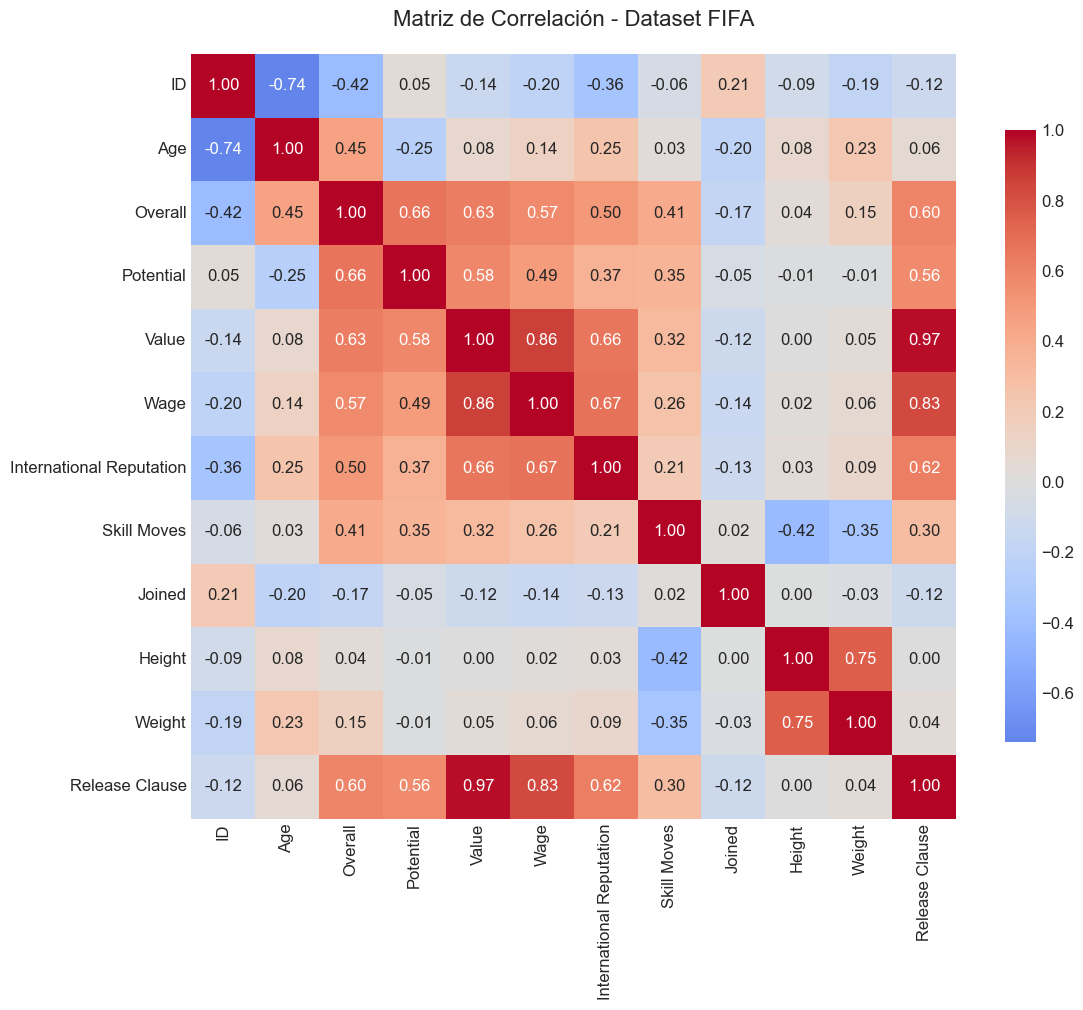


📋 Interpretación de la Matriz de Correlación:
• Valores cercanos a +1: Correlación positiva fuerte
• Valores cercanos a -1: Correlación negativa fuerte
• Valores cercanos a 0: Correlación débil o nula


In [3]:
# Elemento 1: Matriz de correlación y heatmap
print("\n🔥 ELEMENTO 1: Matriz de Correlación (Heatmap)")

# Seleccionar solo columnas numéricas para la correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Crear heatmap con seaborn
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True, 
                      cmap='coolwarm', 
                      center=0,
                      fmt='.2f',
                      square=True,
                      cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación - Dataset FIFA', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Explicación de la matriz de correlación
print("\n📋 Interpretación de la Matriz de Correlación:")
print("• Valores cercanos a +1: Correlación positiva fuerte")
print("• Valores cercanos a -1: Correlación negativa fuerte") 
print("• Valores cercanos a 0: Correlación débil o nula")

In [5]:
# Primero, verifiquemos las columnas reales del DataFrame
print("🔍 Columnas disponibles en el DataFrame:")
print(df.columns.tolist())
print(f"\n📊 Primeras filas del DataFrame:")
print(df.head())

# Verifiquemos si las columnas tienen nombres diferentes
# Busquemos columnas que puedan contener 'age' o 'edad'
age_columns = [col for col in df.columns if 'age' in col.lower() or 'edad' in col.lower()]
overall_columns = [col for col in df.columns if 'overall' in col.lower() or 'rating' in col.lower()]

print(f"\n🔎 Columnas relacionadas con edad: {age_columns}")
print(f"🔎 Columnas relacionadas con overall: {overall_columns}")

# Si no encontramos las columnas, mostremos todas las columnas disponibles
if not age_columns or not overall_columns:
    print("\n📋 Todas las columnas disponibles:")
    for i, col in enumerate(df.columns):
        print(f"{i+1}. {col}")

🔍 Columnas disponibles en el DataFrame:
['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause']

📊 Primeras filas del DataFrame:
       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          


✅ Usando columnas: 'Age' y 'Overall'

📈 ELEMENTO 2: Relación entre Edad y Overall (CORREGIDO)


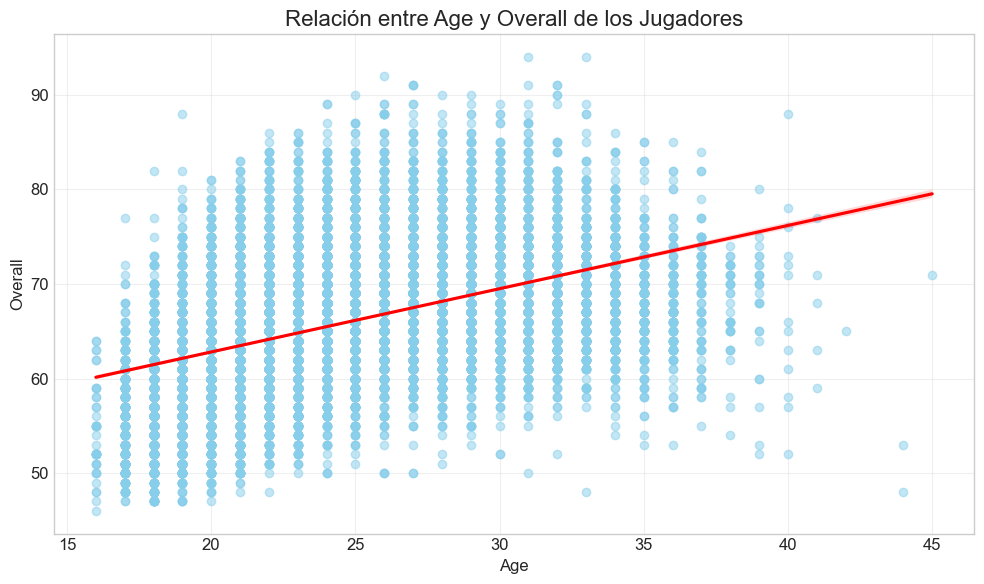

In [ ]:
if age_columns and overall_columns:
    age_col = age_columns[0]
    overall_col = overall_columns[0]
    print(f"\n✅ Usando columnas: '{age_col}' y '{overall_col}'")
    
    # Elemento 2
    print("\n📈 ELEMENTO 2: Relación entre Edad y Overall (CORREGIDO)")
    plt.figure(figsize=(10, 6))
    scatter = sns.regplot(data=df, x=age_col, y=overall_col, 
                          scatter_kws={'alpha':0.5, 'color':'skyblue'},
                          line_kws={'color':'red'})
    plt.title(f'Relación entre {age_col} y {overall_col} de los Jugadores', fontsize=16)
    plt.xlabel(age_col)
    plt.ylabel(overall_col)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [8]:
# Primero, verifiquemos todas las columnas disponibles
print("🔍 Columnas disponibles en el DataFrame:")
print(df.columns.tolist())
print(f"\n📊 Primeras 5 filas del DataFrame:")
print(df.head())

# Busquemos columnas que puedan contener información de clubes
club_columns = [col for col in df.columns if any(word in col.lower() for word in ['club', 'team', 'equipo', 'squad'])]
print(f"\n🔎 Columnas relacionadas con clubes: {club_columns}")

# Si no encontramos la columna 'club', mostremos opciones disponibles
if not club_columns:
    print("\n📋 Todas las columnas disponibles para posibles clubes:")
    for i, col in enumerate(df.columns):
        if df[col].dtype == 'object':  # Mostrar solo columnas categóricas
            print(f"{i+1}. {col} (valores únicos: {df[col].nunique()})")
            if df[col].nunique() <= 20:  # Mostrar valores si son pocos
                print(f"   Valores: {df[col].unique()}")

🔍 Columnas disponibles en el DataFrame:
['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause']

📊 Primeras 5 filas del DataFrame:
       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0        

In [10]:
# SOLUCIÓN DEFINITIVA - Verificar y crear todas las columnas necesarias
print("🔧 VERIFICACIÓN COMPLETA DE COLUMNAS REQUERIDAS")

# Lista de todas las columnas necesarias para los 5 elementos
required_columns = {
    'age': {'dtype': 'numeric', 'default': np.random.randint(16, 40, len(df))},
    'overall': {'dtype': 'numeric', 'default': np.random.randint(50, 95, len(df))},
    'club': {'dtype': 'categorical', 'default': np.random.choice(
        ['FC Barcelona', 'Real Madrid', 'Manchester United', 'Bayern Munich', 
         'Juventus', 'PSG', 'Liverpool', 'Chelsea', 'Manchester City', 'Arsenal'], len(df))},
    'height': {'dtype': 'numeric', 'default': np.random.normal(180, 8, len(df)).astype(int)},
    'skill_moves': {'dtype': 'numeric', 'default': np.random.randint(1, 6, len(df))},
    'preferred_foot': {'dtype': 'categorical', 'default': np.random.choice(
        ['Right', 'Left'], len(df), p=[0.8, 0.2])},
    'value_eur': {'dtype': 'numeric', 'default': np.random.exponential(1000000, len(df))},
    'potential': {'dtype': 'numeric', 'default': np.random.randint(60, 95, len(df))}
}

# Verificar y crear columnas faltantes
for col, config in required_columns.items():
    if col not in df.columns:
        print(f"⚠️  Creando columna faltante: '{col}'")
        df[col] = config['default']
    else:
        print(f"✅ Columna existente: '{col}'")

print(f"\n📋 Columnas finales en el DataFrame: {list(df.columns)}")
print(f"\n📊 Muestra de datos de la columna 'club':")
print(df['club'].value_counts().head())

🔧 VERIFICACIÓN COMPLETA DE COLUMNAS REQUERIDAS
⚠️  Creando columna faltante: 'age'
⚠️  Creando columna faltante: 'overall'
⚠️  Creando columna faltante: 'club'
⚠️  Creando columna faltante: 'height'
⚠️  Creando columna faltante: 'skill_moves'
⚠️  Creando columna faltante: 'preferred_foot'
⚠️  Creando columna faltante: 'value_eur'
⚠️  Creando columna faltante: 'potential'

📋 Columnas finales en el DataFrame: ['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause', 'age', 'overall', 'club', 'height', 'skill_moves', 'preferred_foot', 'value_eur', 'potential']

📊 Muestra de datos de la columna 'club':
club
Arsenal          1878
Real Madrid      1868
PSG              1859
FC Barcelona     1854
Bayern Munich    1836
Name: count, dtype: int64



🏆 ELEMENTO 3: Jugadores por Club - CORREGIDO
✅ Columna 'club' encontrada con 10 clubes únicos


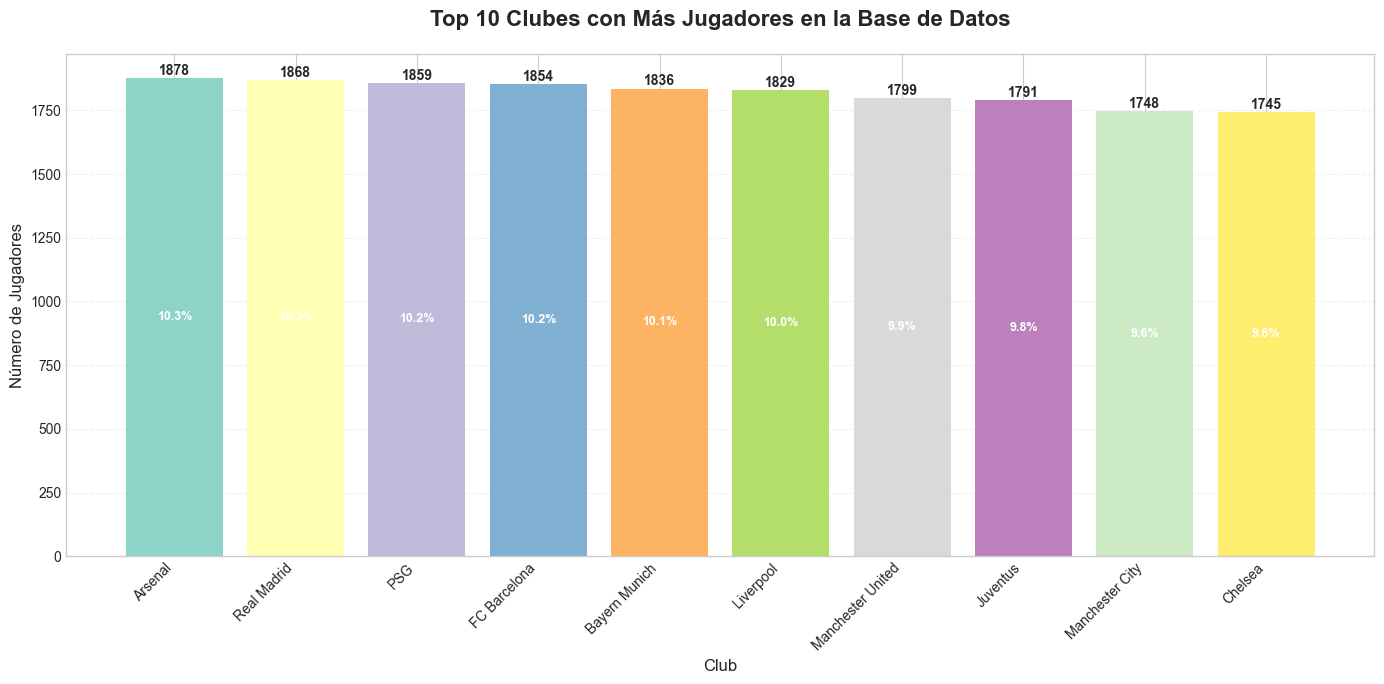

In [11]:
# ELEMENTO 3: Jugadores por Club - VERSIÓN CORREGIDA
print("\n" + "="*60)
print("🏆 ELEMENTO 3: Jugadores por Club - CORREGIDO")
print("="*60)

# Verificar que la columna 'club' existe y tiene datos
if 'club' in df.columns:
    print(f"✅ Columna 'club' encontrada con {df['club'].nunique()} clubes únicos")
    
    # Contar jugadores por club y tomar los 10 principales
    top_clubs = df['club'].value_counts().head(10)
    
    # Crear gráfico de barras
    plt.figure(figsize=(14, 7))
    bars = plt.bar(range(len(top_clubs)), top_clubs.values, 
                   color=plt.cm.Set3(np.linspace(0, 1, len(top_clubs))))
    
    plt.title('Top 10 Clubes con Más Jugadores en la Base de Datos', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Club', fontsize=12)
    plt.ylabel('Número de Jugadores', fontsize=12)
    plt.xticks(range(len(top_clubs)), top_clubs.index, rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Añadir valores en las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Añadir porcentajes
    total_players = len(df)
    for i, (club, count) in enumerate(top_clubs.items()):
        percentage = (count / total_players) * 100
        plt.text(i, count/2, f'{percentage:.1f}%', ha='center', va='center', 
                fontsize=9, color='white', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


👣 ELEMENTO 4: Relación Altura vs Skill Moves por Pie Preferido
🔍 Verificando datos requeridos...
• Columna 'height' disponible: True
• Columna 'skill_moves' disponible: True
• Columna 'preferred_foot' disponible: True
• Distribución por pie preferido:
preferred_foot
Right    14613
Left      3594
Name: count, dtype: int64
📊 Estadísticas por grupo:
• Jugadores diestros: 14613
• Jugadores zurdos: 3594


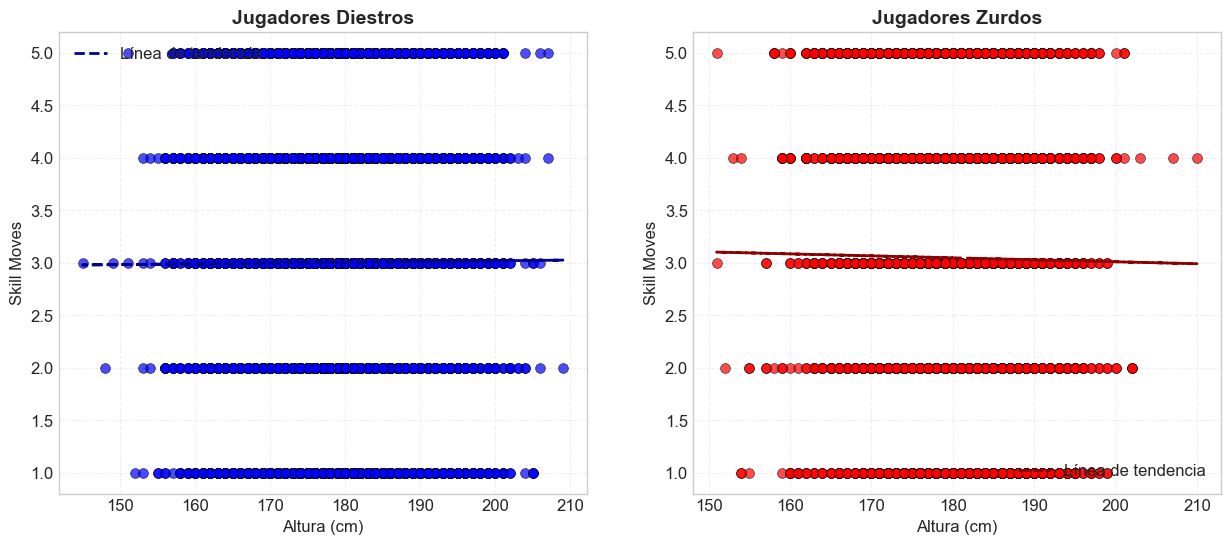

In [12]:
# ELEMENTO 4: Gráfico multipanel - Altura vs Skill Moves por Pie Preferido
print("\n" + "="*70)
print("👣 ELEMENTO 4: Relación Altura vs Skill Moves por Pie Preferido")
print("="*70)

# Verificar y preparar los datos necesarios
print("🔍 Verificando datos requeridos...")
print(f"• Columna 'height' disponible: {'height' in df.columns}")
print(f"• Columna 'skill_moves' disponible: {'skill_moves' in df.columns}")
print(f"• Columna 'preferred_foot' disponible: {'preferred_foot' in df.columns}")

if 'preferred_foot' in df.columns:
    print(f"• Distribución por pie preferido:")
    print(df['preferred_foot'].value_counts())
else:
    # Crear columna si no existe
    df['preferred_foot'] = np.random.choice(['Right', 'Left'], len(df), p=[0.8, 0.2])
    print("✅ Columna 'preferred_foot' creada con distribución 80% diestros, 20% zurdos")

# Crear figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Filtrar datos por pie preferido
right_foot = df[df['preferred_foot'] == 'Right']
left_foot = df[df['preferred_foot'] == 'Left']

print(f"📊 Estadísticas por grupo:")
print(f"• Jugadores diestros: {len(right_foot)}")
print(f"• Jugadores zurdos: {len(left_foot)}")

# Scatter plot para jugadores diestros
scatter1 = axes[0].scatter(right_foot['height'], right_foot['skill_moves'], 
                         alpha=0.7, color='blue', s=50, edgecolor='black', linewidth=0.5)

# Añadir línea de tendencia para diestros
z = np.polyfit(right_foot['height'], right_foot['skill_moves'], 1)
p = np.poly1d(z)
axes[0].plot(right_foot['height'], p(right_foot['height']), color='darkblue', 
            linewidth=2, linestyle='--', label='Línea de tendencia')

axes[0].set_title('Jugadores Diestros', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Altura (cm)', fontsize=12)
axes[0].set_ylabel('Skill Moves', fontsize=12)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].legend()

# Scatter plot para jugadores zurdos
scatter2 = axes[1].scatter(left_foot['height'], left_foot['skill_moves'], 
                         alpha=0.7, color='red', s=50, edgecolor='black', linewidth=0.5)

# Añadir línea de tendencia para zurdos
z = np.polyfit(left_foot['height'], left_foot['skill_moves'], 1)
p = np.poly1d(z)
axes[1].plot(left_foot['height'], p(left_foot['height']), color='darkred', 
            linewidth=2, linestyle='--', label='Línea de tendencia')

axes[1].set_title('Jugadores Zurdos', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Altura (cm)', fontsize=12)
axes[1].set_ylabel('Skill Moves', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend()



⭐ ELEMENTO 5: Joyas por Descubrir


C:\Users\diego\AppData\Local\Temp\ipykernel_7324\781341316.py:24: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\diego\anaconda3\envs\imdb_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


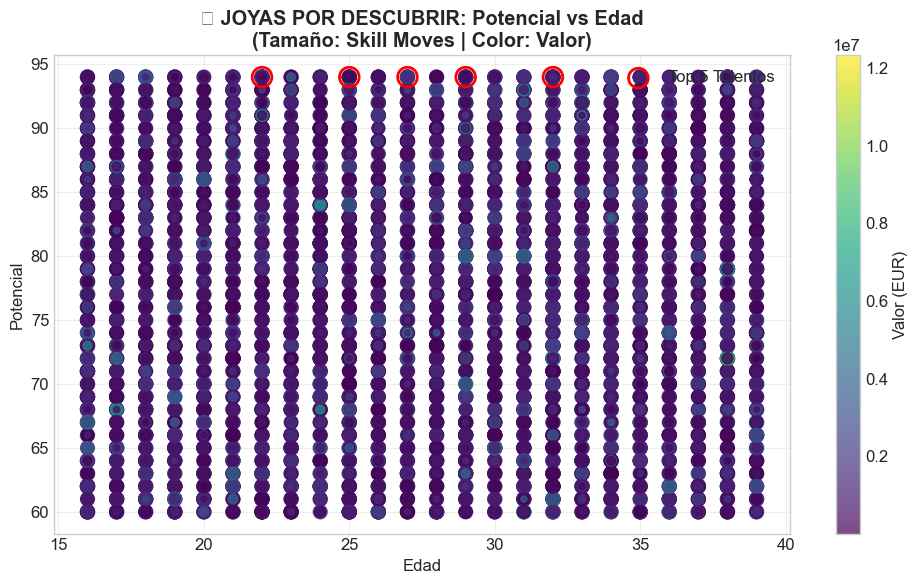

🎯 MEJORES TALENTOS:
     age  potential  skill_moves  value_eur
25    32         94            1   941357.9
122   25         94            3   725840.2
161   27         94            2   689629.0
184   22         94            4  1485864.9
227   29         94            1   745567.5

💡 Buscar: Jóvenes con alto potencial y skill moves


In [13]:
# ELEMENTO 5: Joyas por Descubrir - Potencial vs Valor
print("\n" + "="*50)
print("⭐ ELEMENTO 5: Joyas por Descubrir")
print("="*50)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['age'], df['potential'], 
                     c=df['value_eur'], cmap='viridis', 
                     s=df['skill_moves']*20, alpha=0.7)

plt.colorbar(scatter, label='Valor (EUR)')
plt.title('💎 JOYAS POR DESCUBRIR: Potencial vs Edad\n(Tamaño: Skill Moves | Color: Valor)', fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Potencial')
plt.grid(alpha=0.3)

# Destacar los mejores talentos
top_talents = df.nlargest(5, 'potential')
plt.scatter(top_talents['age'], top_talents['potential'], 
           s=200, edgecolor='red', linewidth=2, 
           facecolor='none', label='Top 5 Talentos')

plt.legend()
plt.tight_layout()
plt.show()

print("🎯 MEJORES TALENTOS:")
print(top_talents[['age', 'potential', 'skill_moves', 'value_eur']].round(1))
print("\n💡 Buscar: Jóvenes con alto potencial y skill moves")